<a href="https://colab.research.google.com/github/WanjohiWanjohi/A-Btesting_SmartAd/blob/master/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impact of interactive ads on brand awareness
An exploration of the Brand Impact Optimiser (BIO) results on an experiment and control group


## Imports :Relevant packages used for the analysis are included in the notebook




In [81]:
#https://drive.google.com/file/d/1FVPOkNiQioJJ1A-NTy3YnoWYJZheCjPg/view?usp=sharing

import csv 
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import scipy.stats as scs
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:

#function to load csv as dataframe

def load_csv_as_df(url):
    s = requests.get(url).content
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_csv(path)
    return df

#function to crete one row for response with 1 as yes and 0 as no
def create_value(row):
    if row['yes'] == 0 and row['no'] == 0:
        return 0
    elif row['yes'] == 1 and row['no'] == 0:
        return 1
    elif row['yes'] == 0 and row['no'] == 1:
      return 0



In [71]:
users = load_csv_as_df(url="https://drive.google.com/file/d/1FVPOkNiQioJJ1A-NTy3YnoWYJZheCjPg/view?usp=sharing")
users['response'] = users.apply(lambda row: create_value(row), axis=1)



The *response* column indicates whether a user is aware of SmartAd or not with a 1 or 0, respectively. 


# Descriptive Statistics Summary


In [69]:
# looking at the distribution of the population
# get user counts in the control and xperiment group
n_a = user_counts.control
n_b = user_counts.exposed
ab_summary = users.pivot_table(values='response', index='experiment', aggfunc=np.sum)# add additional columns to the pivot table
ab_summary['total'] = users.pivot_table(values='response', index='experiment', aggfunc=lambda x: len(x))
ab_summary['rate'] = users.pivot_table(values='response', index='experiment')
ab_summary

,response,total,rate
experiment,,,
control,264,4071,0.064849
exposed,308,4006,0.076885


From this pivot table it is clear that the difference between the two groups (lift), is 0.01 (approximately 1%) but we are not confident of this result. This can be mitigated by looking at the distributions of the two groups. 

We can compare the two groups by plotting the distribution of the control group and calculating the probability of getting the result from our test group. We can assume that the distribution for our control group is binomial because the data is a series of Bernoulli trials, where each trial only has two possible outcomes (similar to a coin flip).


# Plots of Distribution

Text(0, 0.5, 'probability')

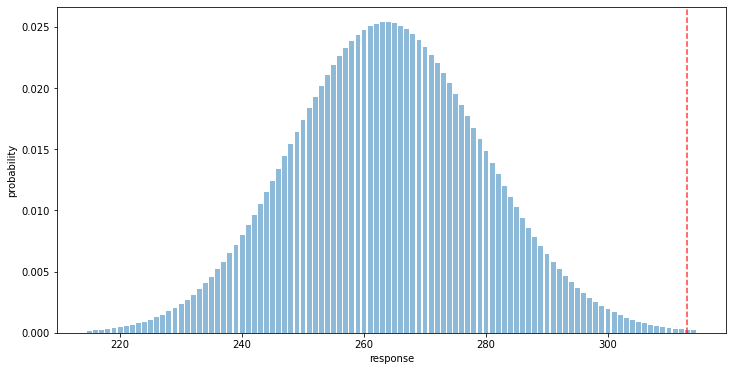

In [83]:
#lets look at the yes and no columns distribution as well as the experiment 
ab_summary['response']['control']
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(int(ab_summary['response']['control'])-49, int(ab_summary['response']['control'])+50, 100)
y = scs.binom(ab_summary['total']['control'], ab_summary['rate']['control']).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=ab_summary['rate']['exposed'] * ab_summary['total']['control'], c='red', alpha=0.75, linestyle='--')
plt.xlabel('response')
plt.ylabel('probability')

The distribution for the control group is shown in blue and the result from the test group is indicated by the red dashed line.
 We can see that the probability of getting the result from the test group was very low. However, the probability does not convey the confidence level of the results.

 Let’s continue and plot the test group results as a binomial distribution and compare the distributions against each other.

NameError: ignored

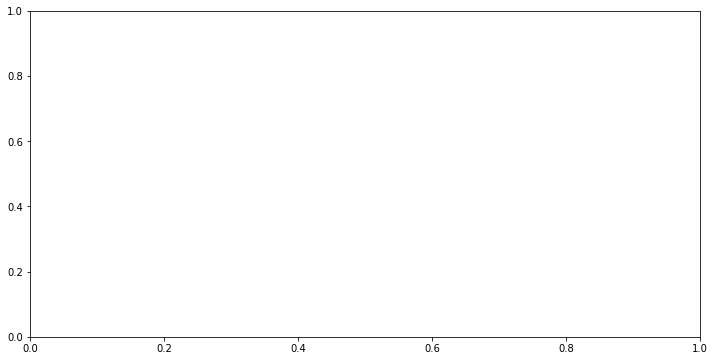

In [84]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(ab_summary['response']['control']-49, ab_summary['response']['control']+50, 100)
yA = scs.binom(ab_summary['total']['control'], p_A).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(ab_summary['response']['exposed']-49, ab_summary['response']['exposed']+50, 100)
yB = scs.binom(ab_summary['total']['exposed'], p_B).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')